# Ramanujan’s Continued Fractions

Ramanujan discovered a variety of beautiful **continued fraction identities**, many of which converged rapidly or revealed surprising relationships to other special functions.

One of his most famous is the **Rogers–Ramanujan Continued Fraction**:

$$
R(q) =
\frac{q^{1/5}}
{1 + \frac{q}{1 + \frac{q^2}{1 + \frac{q^3}{1 + \cdots}}}}
$$

This fraction appears in the **Rogers–Ramanujan identities**, which connect partition theory, q-series, and modular functions.

It converges for \( |q| < 1 \) and satisfies remarkable modular transformations, linking it deeply to the theory of elliptic functions and modular forms.

In this notebook, we’ll:
- Implement and visualize the convergence of \( R(q) \),
- Explore how rapidly it stabilizes for values of \( q \) between 0 and 1.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def ramanujan_continued_fraction(q, depth=20):
    """
    Compute an approximation of Ramanujan’s continued fraction R(q)
    using the first 'depth' terms.
    """
    frac = 0.0
    # Build the continued fraction from the bottom up
    for k in range(depth, 0, -1):
        frac = q**k / (1 + frac)
    return (q**(1/5)) / (1 + frac)


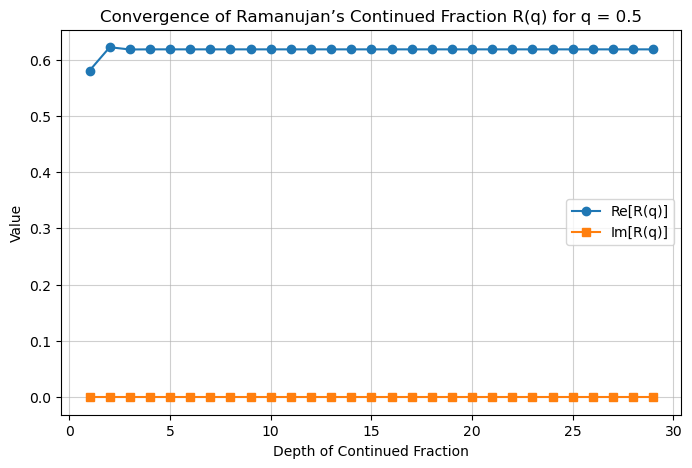

In [3]:
q = 0.5  # you can vary this between 0 and 1
depths = range(1, 30)
values = [ramanujan_continued_fraction(q, d) for d in depths]

plt.figure(figsize=(8,5))
plt.plot(depths, np.real(values), 'o-', label='Re[R(q)]')
plt.plot(depths, np.imag(values), 's-', label='Im[R(q)]')
plt.title(f"Convergence of Ramanujan’s Continued Fraction R(q) for q = {q}")
plt.xlabel("Depth of Continued Fraction")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()


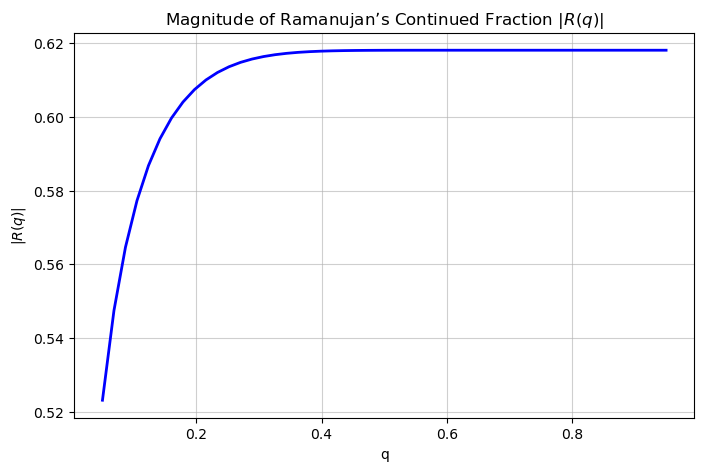

In [4]:
q_values = np.linspace(0.05, 0.95, 50)
r_values = [ramanujan_continued_fraction(q, depth=30) for q in q_values]

plt.figure(figsize=(8,5))
plt.plot(q_values, np.abs(r_values), 'b-', linewidth=2)
plt.title("Magnitude of Ramanujan’s Continued Fraction $|R(q)|$")
plt.xlabel("q")
plt.ylabel(r"$|R(q)|$")
plt.grid(True, alpha=0.6)
plt.show()


### Discussion

Ramanujan’s continued fractions display astonishing structure:

- They converge extremely rapidly for \( |q| < 1 \).
- Their algebraic values at specific \( q \) are tied to **modular equations**.
- The Rogers–Ramanujan continued fraction satisfies:
  $$
  R(q) = \frac{q^{1/5}}{1 + \frac{q}{1 + \frac{q^2}{1 + \frac{q^3}{1 + \cdots}}}}
  $$
  and is connected to the identities:
  $$
  \sum_{n=0}^{\infty} \frac{q^{n^2}}{(1-q)(1-q^2)\cdots(1-q^n)} 
  \quad \text{and} \quad
  \sum_{n=0}^{\infty} \frac{q^{n^2+n}}{(1-q)(1-q^2)\cdots(1-q^n)}
  $$

These relationships inspired later discoveries in **modular functions**, **combinatorics**, and even **string theory**.
